# Regression

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### Data preprocessing

In [4]:
df = pd.read_csv("train_cleaned.csv")
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

# Univariate Regression (2 variables)

In [6]:
df_train, df_test = train_test_split(df, test_size=0.3333333333, random_state=100)

## Linear Regression

### simple

In [7]:
X_train = df_train["instrumentalness"].values.reshape(-1, 1)
y_train = df_train["popularity"].values

X_test = df_test["instrumentalness"].values.reshape(-1, 1)
y_test = df_test["popularity"].values

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-13.0048686]
Intercept: 
 31.25215104399725


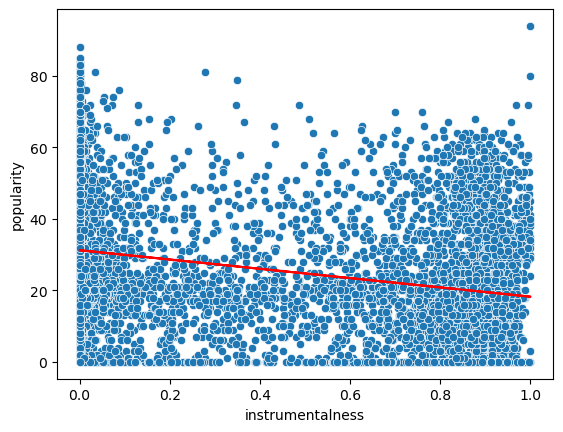

In [10]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity")
plt.plot(X_train, reg.coef_*X_train+reg.intercept_, c="red")
plt.show()

In [11]:
y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.072
MSE: 321.292
MAE: 14.809


In [12]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.070
MSE: 320.069
MAE: 14.878


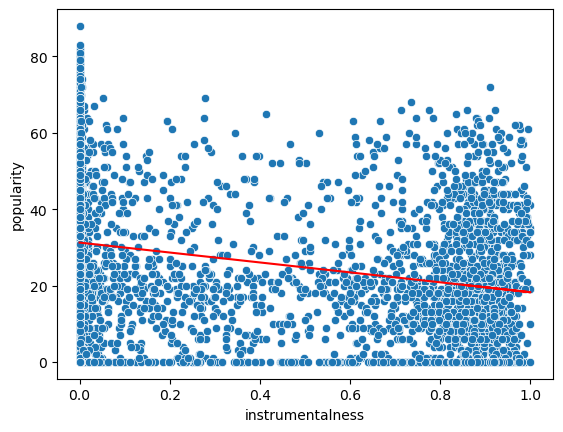

In [13]:
sns.scatterplot(data=df_test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

### Ridge

In [14]:
# Create a Ridge instance
ridge = Ridge()

# Define the range for alpha parameter and list of solver options
param_dist = {
    'alpha': uniform(0.0, 10.0),  # Set the range for alpha
}

# Initialize RandomizedSearchCV with the Ridge regression model and parameter distributions
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best alpha and solver values found by the random search
best_params = random_search.best_params_

# Print the best alpha and solver values
print("Best params:", best_params)


Best params: {'alpha': 4.951769101112702}


In [15]:
reg = Ridge(**best_params)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)


y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-12.96119268]
Intercept: 
 31.239624270277112
R2: 0.072
MSE: 321.292
MAE: 14.810
R2: 0.070
MSE: 320.067
MAE: 14.879


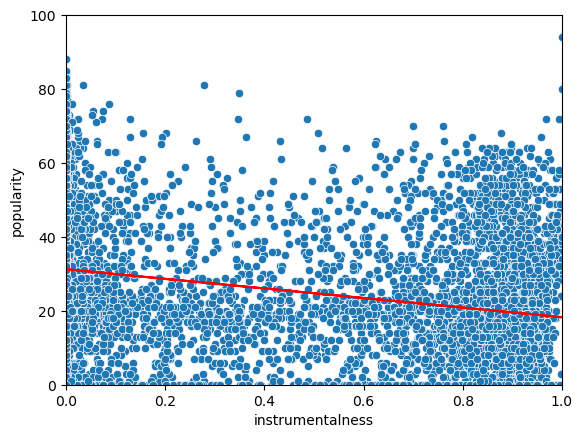

In [16]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity")
avg_coef = reg.coef_.mean()
plt.plot(X_train, avg_coef*X_train + reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

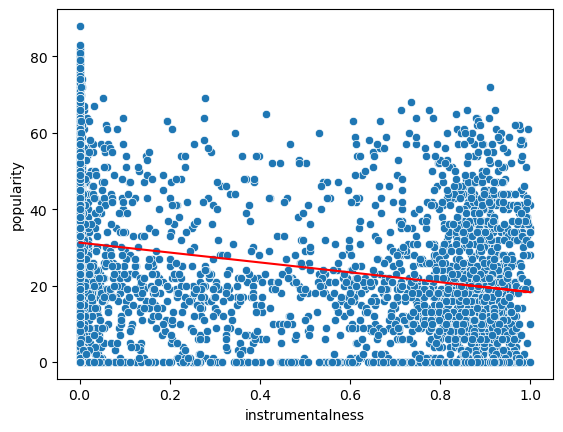

In [17]:
sns.scatterplot(data=df_test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

### Lasso

In [18]:
lasso = Lasso()

# Define the range for alpha parameter
param_dist = {
    'alpha': uniform(0.0, 10.0)  # Set the range for alpha
}

# Initialize RandomizedSearchCV with the Lasso regression model and parameter distributions
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best alpha value found by the random search
best_params = random_search.best_params_

# Print the best alpha value
print("Best alpha:", best_params)

Best alpha: {'alpha': 0.05522117123602399}


In [19]:
reg = Lasso(**best_params)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-12.6290811]
Intercept: 
 31.144370717711944
R2: 0.072
MSE: 321.313
MAE: 14.816
R2: 0.070
MSE: 320.072
MAE: 14.882


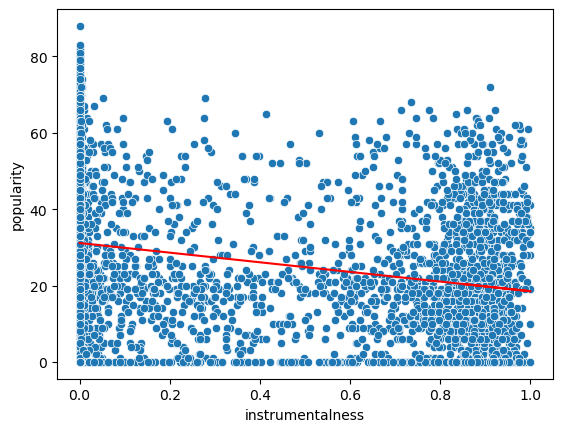

In [20]:
sns.scatterplot(data=df_test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

## Nonlinear regression

### Decision Tree Regressor

In [21]:
from scipy.stats import randint

# Assuming X_train, y_train are your training features and target, respectively

# Create a DecisionTreeRegressor instance
tree = DecisionTreeRegressor()

# Define the hyperparameters and their respective ranges for the random search
param_dist = {
    'max_depth': randint(1, 20),  # Range for max_depth parameter
    'min_samples_split': randint(2, 20),  # Range for min_samples_split parameter
    'min_samples_leaf': randint(1, 20),  # Range for min_samples_leaf parameter
    'max_features': ['auto', 'sqrt', 'log2', None],  # List of options for max_features
    'ccp_alpha': uniform(0.0, 1)  # Define the range for ccp_alpha
}

# Initialize RandomizedSearchCV with the DecisionTreeRegressor and parameter distributions
random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'ccp_alpha': 0.016587828927856152, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 8}


In [22]:
reg = DecisionTreeRegressor(**best_params)

In [23]:
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.107
MSE: 308.970
MAE: 14.319
R2: 0.111
MSE: 306.016
MAE: 14.348


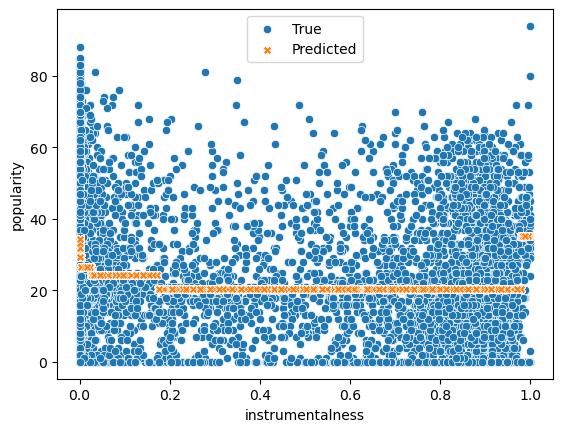

In [24]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df_train, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [25]:
knn = KNeighborsRegressor()

# Define the hyperparameters and their respective ranges for the random search
param_dist = {
    'n_neighbors': randint(1, 20),  # Range for n_neighbors parameter
    'weights': ['uniform', 'distance'],  # List of options for weights parameter
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # List of options for algorithm parameter
    'p': [1, 2]  # List of options for p parameter (for Minkowski distance)
}

# Initialize RandomizedSearchCV with the KNeighborsRegressor and parameter distributions
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}


In [26]:
reg = KNeighborsRegressor(**best_params)

In [27]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=19)

In [28]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.139
MSE: 297.954
MAE: 14.016


In [29]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.080
MSE: 316.639
MAE: 14.615


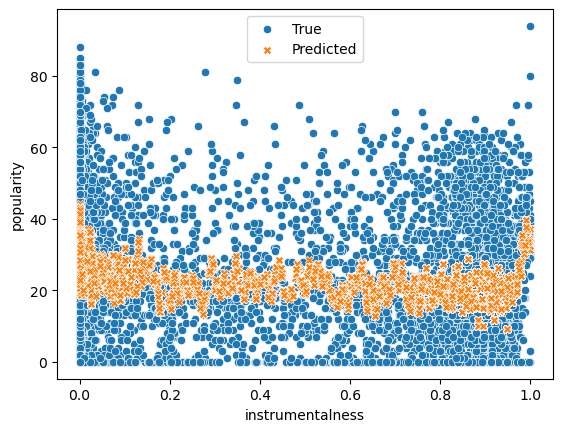

In [30]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df_train, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate Regression (ALL variables)

In [31]:
X_train = df_train[["instrumentalness", "speechiness", "loudness", "duration_ms", 'valence', 'liveness','acousticness','danceability', 'energy']].values
y_train = df_train["popularity"].values

X_test = df_test[["instrumentalness", "speechiness", "loudness", "duration_ms", 'valence', 'liveness','acousticness','danceability', 'energy']].values
y_test = df_test["popularity"].values


## Linear Regression

### simple

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.101
MSE: 311.195
MAE: 14.421


In [34]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.104
MSE: 308.198
MAE: 14.434


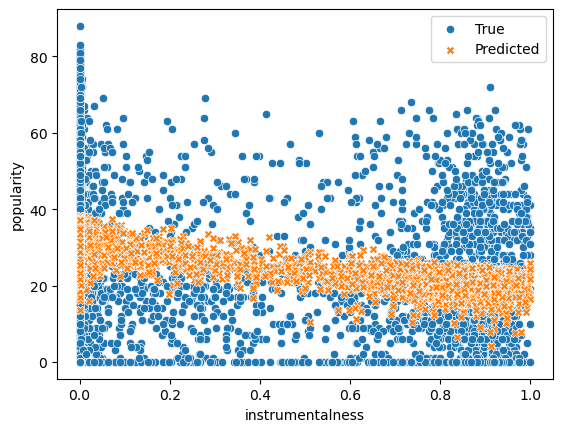

In [35]:
sns.scatterplot(data=df_test, x='instrumentalness', y="popularity", label="True")
sns.scatterplot(data=df_test, x="instrumentalness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### Ridge

In [36]:
ridge = Ridge()

# Define the range for alpha parameter and list of solver options
param_dist = {
    'alpha': uniform(0.0, 10.0),  # Set the range for alpha
}

# Initialize RandomizedSearchCV with the Ridge regression model and parameter distributions
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best alpha and solver values found by the random search
best_params = random_search.best_params_


# Print the best alpha and solver values
print("best_params:", best_params)

best_params: {'alpha': 1.3949386065204183}


In [37]:
reg = Ridge(**best_params)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-1.44153875e+01 -2.59223595e+01 -3.12170182e-02 -5.72064302e-06
 -1.49214641e+00  3.05194385e+00  1.89406714e+00  3.77552069e+00
 -4.87404944e+00]
Intercept: 
 35.47041653610967
R2: 0.101
MSE: 311.197
MAE: 14.422
R2: 0.104
MSE: 308.205
MAE: 14.436


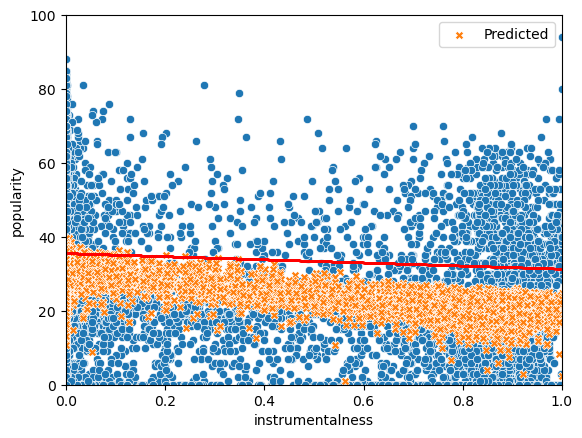

In [38]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity")
sns.scatterplot(data=df_train, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
avg_coef = reg.coef_.mean()
plt.plot(X_train, avg_coef*X_train + reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

### Lasso

In [39]:
lasso = Lasso()

# Define the range for alpha parameter
param_dist = {
    'alpha': uniform(0.0, 10.0)  # Set the range for alpha
}

# Initialize RandomizedSearchCV with the Lasso regression model and parameter distributions
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best alpha value found by the random search
best_params = random_search.best_params_

# Print the best alpha value
print("Best params:", best_params)

Best params: {'alpha': 0.05522117123602399}


In [40]:
reg = Lasso(**best_params)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-1.38710286e+01 -1.82644478e+01 -4.25101993e-02 -5.85954882e-06
 -0.00000000e+00  7.18429809e-01  1.48350353e+00  3.32228379e-01
 -4.07873981e+00]
Intercept: 
 35.967994523965864
R2: 0.098
MSE: 312.096
MAE: 14.473
R2: 0.101
MSE: 309.258
MAE: 14.505


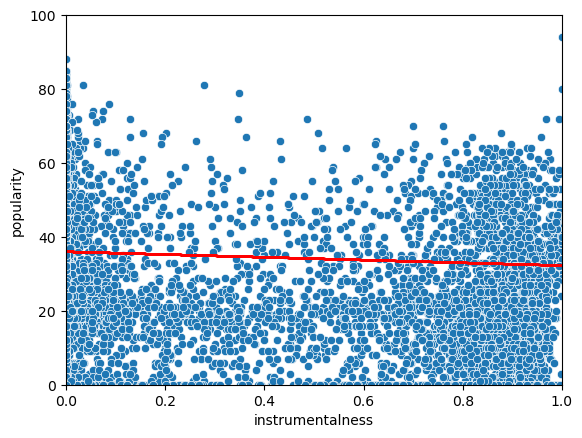

In [41]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity")
avg_coef = reg.coef_.mean()
plt.plot(X_train, avg_coef*X_train + reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

## Nonlinear Regression

In [42]:
# Assuming X_train, y_train are your training features and target, respectively

# Create a DecisionTreeRegressor instance
tree = DecisionTreeRegressor()

# Define the hyperparameters and their respective ranges for the random search
param_dist = {
    'max_depth': randint(1, 20),  # Range for max_depth parameter
    'min_samples_split': randint(2, 20),  # Range for min_samples_split parameter
    'min_samples_leaf': randint(1, 20),  # Range for min_samples_leaf parameter
    'max_features': ['auto', 'sqrt', 'log2', None],  # List of options for max_features
    'ccp_alpha': uniform(0.0, 1)  # Define the range for ccp_alpha
}

# Initialize RandomizedSearchCV with the DecisionTreeRegressor and parameter distributions
random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'ccp_alpha': 0.5393774484000625, 'max_depth': 13, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 17}


In [43]:
reg = DecisionTreeRegressor(**best_params)

In [44]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.5393774484000625, max_depth=13,
                      min_samples_leaf=16, min_samples_split=17)

In [45]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.200
MSE: 276.869
MAE: 13.237


In [46]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.174
MSE: 284.307
MAE: 13.470


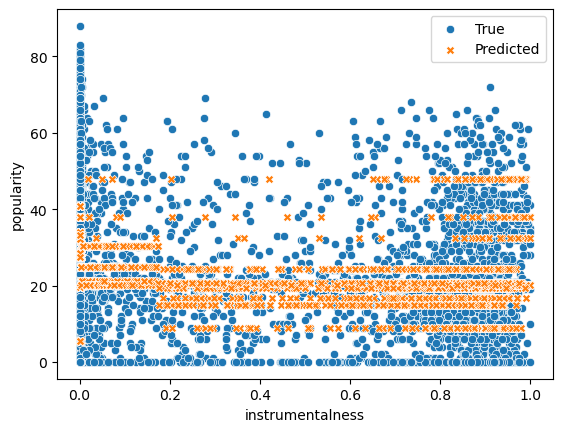

In [47]:
sns.scatterplot(data=df_test, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df_test, x="instrumentalness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint

# Assuming X_train, y_train are your training features and target, respectively

# Create a KNeighborsRegressor instance
knn = KNeighborsRegressor()

# Define the hyperparameters and their respective ranges for the random search
param_dist = {
    'n_neighbors': randint(1, 20),  # Range for n_neighbors parameter
    'weights': ['uniform', 'distance'],  # List of options for weights parameter
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # List of options for algorithm parameter
    'p': [1, 2]  # List of options for p parameter (for Minkowski distance)
}

# Initialize RandomizedSearchCV with the KNeighborsRegressor and parameter distributions
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}


In [49]:
reg = KNeighborsRegressor(**best_params)

In [50]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=19)

In [51]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.084
MSE: 316.935
MAE: 14.679


In [52]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.028
MSE: 353.601
MAE: 15.658


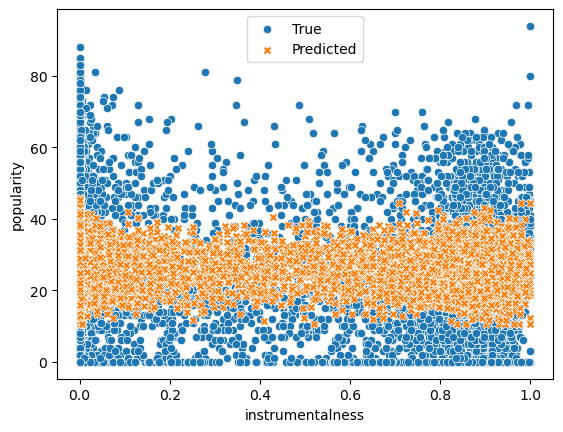

In [53]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df_train, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.legend()
plt.show()